För G:
1. Ladda ner ett eller flera dataset som visar GDP, GDP per capita och förväntad livslängd.
2. Visa hur förväntad livslängd och GDP per capita hänger ihop. Välj själv och motivera hur detta ska visualiseras.
3. Resonera kortfattat om resultaten verkar rimliga och fundera på om det finns någon orsak bakom ditt resultat.

Svara nu på dessa frågor:
4. Gjorde du någon Data Cleaning? Förklara vad du har gjort och motivera detta.
5. Vilka länder har förväntad livslängd en standardavvikelse över medelvärdet?
6. Vilka länder har hög förväntad livslängd men låg GDP/GDP per capita?
7. Har varje stor ekonomi (GDP) lång förväntad livslängd?
8. Om du ändrar definitionen av en stor ekonomi till GDP per capita. Hur förändras resultatet då? Diskutera kort resultatet i 7 och 8. 


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

gdp_data = pd.read_csv("gdp.csv")
gdp_per_capita_data = pd.read_csv("gdp_per_capita.csv")
life_expectancy_data = pd.read_csv("Life-Expectancy-Data-Updated.csv")

In [ ]:
# Cleaning the data

df_gdp = gdp_data.drop(gdp_data.loc[:, '1960' : '2011'].columns, axis=1)
df_gdp = df_gdp.drop(df_gdp.loc[:, '2016' : 'Unnamed: 65'].columns, axis=1)

df_gdp = df_gdp.dropna(axis = 0, thresh=6)

df_capita = gdp_per_capita_data.drop(gdp_per_capita_data.loc[:, '1960' : '2011'].columns, axis=1)
df_capita = df_capita.drop(df_capita.loc[:, '2016' : 'Unnamed: 65'].columns, axis=1)

df_capita = df_capita.dropna(axis=0, thresh=6)

df_life = life_expectancy_data.drop(life_expectancy_data[life_expectancy_data.Year < 2012].index)

df_gdp

In [ ]:

# Question 2

sns.relplot(data=df_life, x="GDP_per_capita", y="Life_expectancy", col="Year", 
            hue="Region", style="Region", col_wrap=2, alpha=.7, s=120)

"""
We use scatterplot to show the relation between life expectancy and GDP per capita.
With a scatterplot we can show each country as a point where we asign its life expectancy and what GDP per capita it has.
As we are using 4 different years this is also divided based on year to show the differance between each year.
"""


<Axes: xlabel='GDP', ylabel='Life_expectancy'>

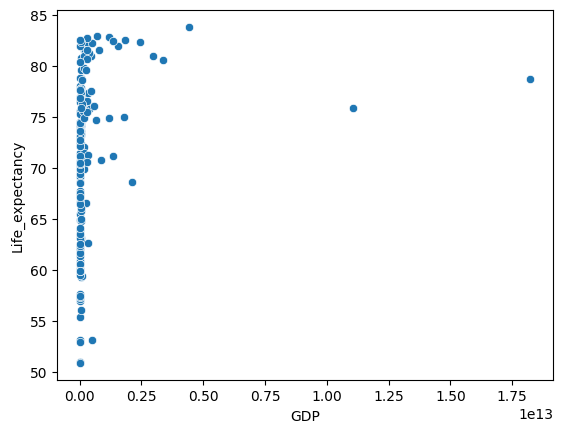

In [9]:

# Question 7 (plot for only 2015)

reduced_life_df = df_life.drop(df_life[df_life.Year != 2015].index)
reduced_life_df = reduced_life_df.drop(reduced_life_df.loc[:, 'Infant_deaths' : 'Economy_status_Developing'].columns, axis=1)

reduced_gdp_df = df_gdp.drop(df_gdp.loc[:, '2012' : '2014'].columns, axis=1)
reduced_gdp_df = reduced_gdp_df.rename({'Country Name':'Country','2015':'GDP'}, axis=1)

merged_df = reduced_life_df.merge(reduced_gdp_df, on='Country')

sns.scatterplot(data=merged_df, x="GDP", y="Life_expectancy")
